<h2><center>Group 2 - Ludovico Gelsomino</center></h2>

#### Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm

from numpy.random import multivariate_normal
from scipy.stats import norm
from scipy.stats import truncnorm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### Plot Settins

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 15, 15
rcParams.update({'axes.facecolor':'whitesmoke'})
tqdm.pandas()

#### Helper Functions

**Function 1**: Print the result of probit regression

**Function 2**: Compare the result of probit regressions

In [3]:
# Function 1
def print_probit(Beta_Probit, cf = 'coef'):
    print(f"   Variable         {cf}")
    print("-------------------------------")
    print(f"const        |    {round(Beta_Probit[0][0],4)}")
    for i in range(9):
        if round(Beta_Probit[i+1][0],4) < 0:
            print(f"{df.columns[i] + ' '*(9-len(df.columns[i]))}    |    {round(Beta_Probit[i+1][0],4)}")
        else:
            print(f"{df.columns[i] + ' '*(9-len(df.columns[i]))}    |     {round(Beta_Probit[i+1][0],4)}")
    print("-------------------------------")


# Function 2
def print_comparison(Beta_Probit, Beta_MCMC, model1 = 'Probit', model2 = 'Bayes. Probit'):
    print(f"   Variable   coef({model1})     coef({model2})")
    print("--------------------------------------------------")
    print(f"const        |   {round(Beta_Probit[0][0],4)}     |   {round(np.mean(Beta_MCMC, axis=0)[0],4)}")
    for i in range(9):
        if Beta_Probit[i+1][0] >= 0 and np.mean(Beta_MCMC, axis=0)[i+1] < 0:
            print(f"{df.columns[i] + ' '*(9-len(df.columns[i]))}    |    {round(Beta_Probit[i+1][0],4)} {' '*(6-len(str(round(Beta_Probit[i+1][0],4))))}    |   {round(np.mean(Beta_MCMC, axis=0)[i+1],4)}")
        elif Beta_Probit[i+1][0] < 0 :
            print(f"{df.columns[i] + ' '*(9-len(df.columns[i]))}    |   {round(Beta_Probit[i+1][0],4)} {' '*(6-len(str(round(Beta_Probit[i+1][0],4))))}    |   {round(np.mean(Beta_MCMC, axis=0)[i+1],4)}")
        else:
            print(f"{df.columns[i] + ' '*(9-len(df.columns[i]))}    |    {round(Beta_Probit[i+1][0],4)} {' '*(6-len(str(round(Beta_Probit[i+1][0],4))))}    |    {round(np.mean(Beta_MCMC, axis=0)[i+1],4)}")
    print("--------------------------------------------------")


**Function 3**: Hist Plots

**Function 4**: Trace Plots

**Function 5**: Trace Plots

**Function 6**: Autocorrelation Plot

In [4]:
# Function 3
def hist(Beta_MCMC, post_mean_up, post_mean,Beta_Probit):
    fig = plt.figure(figsize=(26, 14))
    rows, columns = 3,3
    for i in range(1,10): 
        fig.add_subplot(rows, columns, i)
        plt.hist(Beta_MCMC[:,i], bins=30, color='silver', edgecolor='black',density = True) #last 5000 samples
        plt.axvline(x = post_mean_up[i], color = 'yellow', label = 'Bayesian UP',linewidth=1)
        plt.axvline(x = post_mean[i], color = 'red', label = 'Bayesian CP',linewidth=1, linestyle = 'dashed')
        plt.axvline(x = Beta_Probit[i], color = 'lime', label = 'Probit',linewidth=1,linestyle = 'dashed')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        sns.kdeplot(Beta_MCMC[:,i], color = 'black')
        plt.legend()
        plt.title(f"Distribution of coeff {df.columns[i]}")
    plt.show()

# Function 4
def trace(Beta_MCMC):
    fig = plt.figure(figsize=(25, 15))
    rows,columns = 3,3
    for i in range(1,10): 
        fig.add_subplot(rows, columns, i)
        plt.plot(Beta_MCMC[:,i], color = 'gray')
    
        cumulative_sum = np.cumsum(Beta_MCMC[:, i])
        line_values = cumulative_sum / np.arange(1, len(Beta_MCMC) + 1)
        plt.plot(line_values, color="goldenrod", linewidth=2)
        plt.title(f"{df.columns[i]}")
    plt.show()

# Function 5
def trace_2(Beta_MCMC, n_batches = 20):
    fig = plt.figure(figsize=(25, 15))
    rows,columns = 3,3
    batch_size = len(Beta_MCMC)/n_batches
    
    for i in range(1,10): 
        fig.add_subplot(rows, columns, i)
        sns.boxplot(x=np.repeat(np.arange(n_batches),batch_size), y=Beta_MCMC[:, i],
                     color="gray", legend = False,width=0.7)
        
        plt.title(f"{df.columns[i]}")
    plt.show()

# Function 6
def autocorr(Beta_MCMC):
    fig = plt.figure(figsize=(25, 20))
    rows,columns = 3,3
    
    for i in range(1,10): 
        fig.add_subplot(rows, columns, i)
        pd.plotting.autocorrelation_plot(Beta_MCMC[:, i], color = 'gray')
        plt.ylim(-0.04,0.04)
        plt.grid(axis = 'y')
        plt.title(f"{df.columns[i]}")
    plt.show()

**Function 7**: Diagnostic on Z (trace, autocorralation)

In [5]:
#Function 7
def diagnostic_z(zeta_pos, zeta_neg, n_batches=20):
    fig, axes = plt.subplots(2, 4, figsize=(25, 12))
    l = [zeta_pos, zeta_neg]
    k = ['zeta positive', 'zeta negative']
    batch_size = [len(zeta) / n_batches for zeta in l]

    for i in range(2):

        axes[i, 0].hist(l[i], bins=50, color='silver', edgecolor='black', density = True) #last 5000 samples
        sns.kdeplot(l[i], color = 'black', ax = axes[i, 0])
        axes[i, 0].set_title(f"{k[i]}")
        
        axes[i, 1].plot(l[i], color='gray')
        cumulative_sum = np.cumsum(l[i])
        line_values = cumulative_sum / np.arange(1, len(l[i]) + 1)
        axes[i, 1].plot(line_values, color="goldenrod", linewidth=2)
        axes[i, 1].set_title(f"{k[i]}")

        positions = np.repeat(np.arange(n_batches), batch_size[i])[:len(l[i])]
        sns.boxplot(x=positions, y=l[i], ax=axes[i, 2], 
                    color="gray", legend = False, width=0.7)
        axes[i, 2].set_ylim(-7, 7)
        axes[i, 2].set_title(f"{k[i]}")

        j = min(len(l[i]), 10000)
        pd.plotting.autocorrelation_plot(l[i][-j:], color='gray', ax=axes[i, 3])  # Adjusted the index here
        axes[i, 3].set_ylim(-0.2, 0.2)
        axes[i, 3].grid(axis='y')
        axes[i, 3].set_title(f"Autocorrelation of {k[i]}")

    plt.tight_layout()
    #plt.savefig('diag_z.png')
    plt.show()

**Function 8:** computing the average marginal effects of probit coefficient

In [6]:
# Function 8

def get_ame_2(coeff, X):
    marg_eff = []
    for i in range(X.shape[1]):
        eff = np.mean(norm.pdf(X@post_mean)*post_mean[i])
        marg_eff += [eff]
    marg_eff[5] = np.mean(norm.cdf(X[:,:4]@post_mean[:4] + X[:,6:]@post_mean[6:] + post_mean[5]) - norm.cdf(X[:,:4]@post_mean[:4] + X[:,6:]@post_mean[6:]))
    return np.around(np.array(marg_eff).reshape(-1,1),4)

# Probit Regression

The probit regression is usually formulated as the following Generalized Linear Model:
- **Random Component**:   $Y_i \stackrel{ind}{\sim} Bernoulli(\mu_i)$
- **Systematic Component**:   $\eta_i = X_i^T\beta$
- **Link function**:   $\eta_i = \Phi^{-1}(\mu_i) $

Therefore we have that, under probit regression $Y_i \stackrel{ind}{\sim} \text{Ber}(\Phi(x_i^T\beta))$. The corresponding pdf is
$$
f(y_i \, ; \Phi(x_i^T\beta)) = [\Phi(x_i^T\beta)]^{y_i}[1 - \Phi(x_i^T\beta)]^{(1-y_i)}
$$
with 
$$
\mathbb{E}[Y_i] = \Phi(x_i^T\beta) \quad \text{and} \quad \mathbb{V}(Y_i) = \Phi(x_i^T\beta)[1 - \Phi(x_i^T\beta)]
$$
In an ideal frequentist setting, we would infer the parameters $\beta$ of the Regression analytically, by maximizing the Likelihood Function: 
$$\hat{\beta}_{MLE} = \underset{\beta}{\arg\max} \textbf{ } \mathcal{L}(\beta; Y, X)$$
where 
$$\mathcal{L}(\beta; Y, X) = \prod_{i=1}^n [\Phi(x_i^T\beta)]^{Y_i}[1 - \Phi(x_i^T\beta)]^{(1-Y_i)} $$
Unfortunately, there is no readily available analytical solution for this specific likelihood function. Consequently, the application of an optimization technique becomes necessary.



## Fisher Scoring for Probit Regression


In the case of a Generalized Linear Model (GLM) model, the updating equation of the Fisher scoring method is expressed as:
$$
\beta_{t+1} = \beta_{t} + \mathbb{I}(\beta_{t})^{-1} U(\beta_{t}) 
$$
where $U$ denotes the vector of partial derivatives of the log-likelihood, and $\beta_{t}$ is the vector of the current updates of the coefficients vector estimate. It is necessary to compute the elements of the vector $l'(\beta)$ and the Fisher information matrix.

For $Y = (Y_1, \ldots, Y_n)^T$ and $\mu = (\mu_1, \ldots, \mu_n)^T$, we can write the Fisher information matrix and the vector of partial-derivatives of the log-likelihood as : 
$$\mathbb{I}(\beta) = X^T W X \quad, \quad  U = X^T A(Y - \mu)$$ 
where \(W\) and $A$ are diagonal matrix with elements
$$w_{ii} = \frac{1}{\mathbb{V}(Y_i)}\left(\frac{\partial\eta_i}{\partial\mu_i}\right)^{-2}, \quad a_{ii} = \frac{1}{\mathbb{V}(Y_i)}\left(\frac{\partial\eta_i}{\partial\mu_i}\right)^{-1}$$
Assuming to observe a vector $Y \stackrel{ind}{\sim} \text{Bern}(\Phi(X^T\beta))$ of $n$ elements and a $p \times n$ covariate matrix, the update equation becomes
$$
\beta_{t+1} = \left(X^tW_{t}X\right)^{-1}X^tW_tZ_t,
$$
where $W$ is a $n \times n$ diagonal matrix with elements
$$
W_{ii} = \frac{1}{\mathbb{V}(Y_i)} \left(\frac{\partial \eta_i}{\partial \mu_i} \right)^{-2} = \frac{1}{\mu_i(1-\mu_i)}\phi(\eta_i)^2   = \frac{\phi(x_i^T\beta)^2}{\Phi(x_i^T\beta)(1-\Phi(x_i^T\beta))}
$$
and $Z$ is a $n \times 1$ vector with elements
$$
Z_i = \eta_i +(Y_i -\mu_i)\left(\frac{\partial \eta_i}{\partial \mu_i} \right) = x_i^T\beta + \frac{Y_i - \Phi(x_i^T\beta)}{\phi(x_i^T\beta)}.
$$

In [7]:
# Probit Regression Fisher Scoring

def Probit(X,Y, epsilon):

    n,p = np.shape(X)
    
    #Initial values of the algorithms
    b_0 = np.zeros((p,1))
    mu = norm.cdf(np.dot(X,b_0)) #mu
    W = np.diag((norm.pdf(np.dot(X,b_0))**2 / (mu* (1 - mu))).reshape(n,)) #W
    Z = np.dot(X,b_0)+(Y-mu) / norm.pdf(x = np.dot(X,b_0)) #Z
    
    #boolean
    convergence = False
    while not convergence:
        
        #new estimate
        b = np.linalg.multi_dot([np.linalg.inv(np.linalg.multi_dot([X.T, W, X])), X.T,W, Z])
        mu = norm.cdf(np.dot(X,b)) #mu
        W = np.diag((norm.pdf(np.dot(X,b))**2 / ( (mu - 1e-20)* (1-mu - 1e-20))).reshape(n)) #W  Note: 1e-20 are added to prevent denom = 0
        Z =np.dot(X,b)+(Y-mu) / (norm.pdf(np.dot(X,b)) + 1e-20 ) #Z Note: 1e-20 is added to prevent denom = 0
        
        if np.linalg.norm(b-b_0)/(np.linalg.norm(b_0)+epsilon) < epsilon:
        #relative convergence criterion
            convergence = True
            print("\nConvergence reached with value:",np.linalg.norm(b-b_0)/(np.linalg.norm(b_0)+epsilon))
        b_0 = b #old value
        
    return(b)

#### Testing the Algorithm on Simulated Data

In [8]:
#Simulated data
np.random.seed(1921) #seed
p = 5 #number of variables
n = 1000 #number of observations

#covariate matrix
X = np.ones(n, dtype=int) #intercept
X = np.reshape(X, (n, 1))
X_sim = np.hstack((X, np.random.normal(size=(n, p)))) #gaussian covariates

true_beta = np.random.randint(5, size=p+1) #true coefficients chosen at random

#simulated dependent variable
prob = norm.cdf(np.dot(X_sim, true_beta))
Y_sim = np.random.binomial(1,prob).reshape((n,1))

## Run the algorithm
beta = Probit(X_sim,Y_sim,epsilon = 0.000001)            #
print("Beta (Fisher Scoring):", beta.reshape((p+1,))) #estimated beta
print("True beta:", true_beta) #true beta


Convergence reached with value: 7.988836807338294e-08
Beta (Fisher Scoring): [ 0.02146265  1.92477116 -0.01228137  1.09703903  4.23311088  2.26932166]
True beta: [0 2 0 1 4 2]


#### Appling the Algorithm on Real Data

In [9]:
df = pd.read_csv('/Users/lemon/Documents/Uni/Magistrale/Semestre 3/Statistics/Final Project/SAheart.txt', sep = ' ')
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [10]:
#Data Preparation
Y = df['chd'].to_numpy()
Y = Y.reshape((-1,1))

X = df.loc[:,'sbp':'age'].to_numpy()
X = np.hstack((np.ones((462,1), dtype=int), X))

In [11]:
Beta_Probit = Probit(X,Y,epsilon = 0.000001)
print_probit(Beta_Probit)


Convergence reached with value: 7.091248653262338e-08
   Variable         coef
-------------------------------
const        |    -3.5702
sbp          |     0.0038
tobacco      |     0.0482
ldl          |     0.1028
adiposity    |     0.0124
famhist      |     0.539
typea        |     0.0236
obesity      |    -0.0402
alcohol      |     0.0
age          |     0.0263
-------------------------------


## Bayesian Probit Regression

Let $y$ be the data, following some distribution $\pi(y | \beta)$, i.e., the likelihood, with $\beta \in \Theta \subseteq \mathbb{R}^p$ being an unknown set of parameters.
Let $\pi(\beta)$ be the prior distribution associated with $\theta$.
In Bayesian analysis, inference is based on the posterior distribution for $\beta$, defined as
$$
\pi(\beta | y) = \frac{\pi(\beta) \pi(y | \beta)}{\int_{\Theta} \pi(\beta) \pi(y | \beta) \, d\beta}.
$$
Let $\mathbf{y} = (y_1, \ldots, y_n)^T$ be the vector of binary responses.
Let $\mathbf{X}$ be the corresponding design matrix, with its generic row given by $\mathbf{x}^T_i = (1, x_{i2}, \ldots, x_{ip})$, for $i = 1, \ldots, n$.
We assume independent Gaussian priors $N(0, \sigma_0^2)$ for each $\beta_1, \ldots, \beta_p$. 
Hence, $$\beta_j \sim N(0, \sigma_0^2) \quad j = 1, \ldots, p \quad \Rightarrow \pi(\beta) = \prod_{j=i}^p\phi(\beta_j; 0, \sigma_0^2)$$
The likelihood function of a probit regression model is as follows:

$$
\begin{equation}
\begin{split}
    \pi(y|\beta) & = \prod_{i=1}^{n} [\Phi(X_i^T \beta))_i]^{y_i} \cdot [1 - \Phi(X_i^T \beta)]^{1 - y_i} \\
    & = \prod_{i=1}^{n}[1(y_i = 1)\Phi(x_i^T \beta) + 1(y_i = 0)\{1 - \Phi(x_i^T \beta)\}]
\end{split}
\end{equation}
$$

The posterior can be obtained via Bayes' rule. Under Gaussian priors, this yields:
$$
\pi(\beta | y) = \frac{\prod_{j=1}^{p} \phi(\beta_j; 0, \sigma_0^2) \prod_{i=1}^{n} [\Phi(X_i^T\beta)]^{y_i}[1 - \Phi(X_i^T\beta)]^{(1-y_i)} }{\int_{\mathbb{R}^p} \prod_{j=1}^{p} \phi(\beta_j; 0, \sigma_0^2) \prod_{i=1}^{n} [\Phi(X_i^T\beta)]^{y_i}[1 - \Phi(X_i^T\beta)]^{(1-y_i)} d\beta}
$$
whose normalizing constant is often intractable and difficult to compute.


### Augmented Data Model

To ease the computation, we introduce a vector of latent variables $z\in Z \subseteq \mathbb{R}^q$ and we treat them as if they were an additional set of unknown parameters. We let  $ \pi(y, z | \beta)$ be the augmented likelihood and we define the augmented posterior 
$$\pi(\beta, z | y) \propto \pi(y, z | \beta) \pi(\beta)$$
In this framework, we focus on the augmented posterior $\pi(\beta, z | y)$, in the hope that it is more tractable than $\pi(\beta | y)$ under suitable data augmentation strategies. Usually, these strategies lead to conditional conjugacy results for $\pi(\beta | y, z)$ and $\pi(z | y, \beta)$. The conditional conjugacy allows, for example, easier sampling from $\pi(\beta, z | y)$ relative to directly targeting $\pi(\beta | y)$ because the augmented likelihood is typically more tractable than the original one. If one is interested only in the original parameters $\beta$ or in the latent dimensions $z$, then it suffices to ignore the other set of sampled parameters.

#### **Augmented Data Model with Uninformative Prior**

Let $z = (z_i,...,z_n)$ with $z_i \sim \mathcal{N}(x_i^T\beta,1)$ be a vector of latent variables and set our binary variable $y_i = 1(z_i>0)$ for $i = 1,...,n$.
Assuming constant priors, we get $\pi(\beta) \propto 1$.

In order to apply a Gibbs Sampling strategy, we need to retrieve the full conditionals 
$$\beta|z,y,X \text{ and } z|\beta,y,X$$

**Full conditional of $\beta$**

Given that $\beta$ is conditionally independent of $y|z$, we get $\pi(\beta|z,y,X) = \pi(\beta|z,X)$ and the augmented posterior can be reduced to:
$$\pi(\beta, z | y) \propto \pi(y, z | \beta) \pi(\beta)$$
Thus
$$
\begin{equation}
\begin{split}
    \pi(\beta|z,X) & \propto \pi(\beta) \pi(z | \beta, X) \\
    & \propto  \exp\left\{-0.5 (z - X\beta)^T (z - X\beta)\right\} \\
    & \propto  \exp\left\{-0.5 (\beta- (X^TX)^{-1}X^Tz)^T(X^TX)(\beta- (X^TX)^{-1}X^Tz)\right\} 
\end{split}
\end{equation}
$$

Thus, under the constant prior for the coefficients, the full conditional $\beta$ is known:
$$
\beta | z,X \sim \mathcal{N}_p(\mu, \Sigma), \quad \mu = \Sigma X^T z, \quad \Sigma = (X^T X)^{-1}.
$$
**Full conditional of $z$**

To "impute" data $z$, recall that each $\pi(z_i | \beta, X) = \phi(z_i ; x_i^T \beta, 1)$ independently for each $i = 1, \ldots, n$. 
Hence, $\pi(z | y, \beta) = \prod_{i=1}^n \pi(z_i | y_i, \beta)$, where each term is proportional to $\phi(z_i; x_i^T \beta, 1) \cdot 1(z_i > 0)$ if $y_i = 1$ or to $\phi(z_i; x_i^T \beta, 1) \cdot 1(z_i \leq 0)$ if $y_i = 0$. 
This means that each $\pi(z_i | y_i , \beta)$ is a truncated normal distribution 
$$
z_i|\beta_i,y_i,X_i  \sim \begin{cases}
  \mathcal{TN}(x^T_i\beta,1,0,\infty) & \text{if } y_i = 1 \\
  \mathcal{TN}(x^T_i\beta,1,-\infty,0) & \text{if } y_i = 0
        \end{cases}
$$

#### **Augmented Model Independent Gaussian priors**

Let $z = (z_i,...,z_n)$ with $z_i \sim \mathcal{N}(x_i^T\beta,1)$ be a vector of latent variables and set our binary variable $y_i = 1(z_i>0)$ for $i = 1,...,n$.

Assuming independent Gaussian priors $\beta_j \sim N(0, \sigma_0^2) \quad j = 1, \ldots, p$
 we get $$\pi(\beta) = \prod_{j=i}^p\phi(\beta_j; 0, \sigma_0^2)$$
In order to apply a Gibbs Sampling strategy, we need to retrieve the full conditionals
$$\beta|z,y,X \text{ and } z|\beta,y,X$$

**Full conditional of $\beta$**

Given that $\beta$ is conditionally independent of $y|z$, we get $\pi(\beta|z,y,X) = \pi(\beta|z,X)$ and the augmented posterior can be reduced to:
$$\pi(\beta, z | y) \propto \pi(y, z | \beta) \pi(\beta)$$
Thus
$$
\begin{equation}
\begin{split}
    \pi(\beta|z,X) & \propto \pi(\beta) \pi(z | \beta, X) \\
    & \propto \exp\left\{-0.5 \beta^T (\sigma^{-2}I_p) \beta\right\} \exp\left\{-0.5 (z - X\beta)^T (z - X\beta)\right\} \\
    & \propto \exp\left\{-0.5 \beta^T (X^T X + \sigma^{-2}I_p) \beta + \beta^T X^T z\right\} \\
\end{split}
\end{equation}
$$
Calling $\Sigma = (X^T X + \sigma^{-2}I_p)^{-1}$
$$
\begin{equation}
\begin{split}
    \pi(\beta|z,X) & \propto \exp\left\{-0.5 \beta^T \Sigma^{-1} \beta + \beta^T \Sigma^{-1} \Sigma X^T z - 0.5 z^T X \Sigma \Sigma^{-1} \Sigma X^T z\right\} \\
    & \propto \exp\left\{-0.5 (\beta - \Sigma X^T z)^T \Sigma^{-1} (\beta - \Sigma X^T z)\right\}
\end{split}
\end{equation}
$$ 

Thus, under Gaussian priors for the coefficients, the full conditional $\beta$ is known:
$$
\beta | z,X \sim \mathcal{N}_p(\mu, \Sigma), \quad \mu = \Sigma X^T z, \quad \Sigma = (X^T X + \sigma_0^{-2}I_p)^{-1}.
$$

**Full conditional of $z$**

To "impute" data $z$, recall that each $\pi(z_i | \beta, X) = \phi(z_i ; x_i^T \beta, 1)$ independently for each $i = 1, \ldots, n$. 
Hence, $\pi(z | y, \beta) = \prod_{i=1}^n \pi(z_i | y_i, \beta)$, where each term is proportional to $\phi(z_i; x_i^T \beta, 1) \cdot 1(z_i > 0)$ if $y_i = 1$ or to $\phi(z_i; x_i^T \beta, 1) \cdot 1(z_i \leq 0)$ if $y_i = 0$. 
This means that each $\pi(z_i | y_i , \beta)$ is a truncated normal distribution 
$$
z_i|\beta_i,y_i,X_i  \sim \begin{cases}
  \mathcal{TN}(x^T_i\beta,1,0,\infty) & \text{if } y_i = 1 \\
  \mathcal{TN}(x^T_i\beta,1,-\infty,0) & \text{if } y_i = 0
        \end{cases}
$$

## Gibbs Sampling Strategies

If the full conditionals are available in closed form, we can apply a Gibbs Sampling strategy to target the augmented posterior $\pi(\beta, z | y)$.

- **Step 1:** Sample from the 'posterior' of $\beta$ based on the complete likelihood $\pi(\beta|z,X)$

- **Step 1:** Sample z from the full conditional $\pi(z|\beta,y,X)$

Sampling iteratively from the distribution in step 1 and step 2 yields a Markov chain that is guaranteed to have as stationary distribution the actual posterior $ \pi(z, \beta | y, X)$. Hence, samples from $\beta$ correspond to those from $ \pi(\beta | y, X)$.

**Gibbs Sampling strategy based on full conditionals with constant priors**

- **Step 1:** Sample $\beta^{(s)} \sim \mathcal{N}_p(\mu, \Sigma)$ with $\mu = \Sigma X^T z^{(s-1)}, \text{ and } \Sigma = (X^T X)^{-1}$

- **Step 1:** Sample  $
z_{1,...,n}^{(s)}\sim 
\begin{cases}
  \mathcal{TN}(x^T_i\beta^{(s)},1,0,\infty) & \text{if } y_i = 1 \\
  \mathcal{TN}(x^T_i\beta^{(s)},1,-\infty,0) & \text{if } y_i = 0
\end{cases}
$


**Gibbs Sampling strategy based on full conditionals with Independent Gaussian priors**

- **Step 1:** Sample $\beta^{(s)} \sim \mathcal{N}_p(\mu, \Sigma)$ with $\mu = \Sigma X^T z^{(s-1)}, \text{ and } \Sigma = (X^T X + \sigma_0^{-2}I_p)^{-1}$

- **Step 1:** Sample  $
z_{1,...,n}^{(s)}\sim 
\begin{cases}
  \mathcal{TN}(x^T_i\beta^{(s)},1,0,\infty) & \text{if } y_i = 1 \\
  \mathcal{TN}(x^T_i\beta^{(s)},1,-\infty,0) & \text{if } y_i = 0
\end{cases}
$



In [12]:
# Bayesian Probit Regression with independent Gaussian Priors

def Bayes_Probit(X,Y, S = 10000, seed = 1):
    np.random.seed(seed)
    
    n,p = np.shape(X)[0], np.shape(X)[1]

    # Matrix storing samples of the \theta parameter
    Beta_Chain = np.zeros((S, p)) 
    zeta_neg_chain = np.empty(0)
    zeta_pos_chain = np.empty(0)

    #Initial Parameters
    sigma_0 = np.eye(p, dtype = int)*10
    beta = np.zeros(p)
    z = np.zeros(n)

    #Posterior Variance
    V = np.linalg.inv(np.linalg.inv(sigma_0**2) + X.T@X)
    
    # MCMC algorithm
    for s in range(S):
        mu_z = X@beta #This is the mean of the latent variable z
    
        # Update elements in z where y == 0
        mask_0 = (Y == 0).flatten()
        mu_0 = mu_z[mask_0]
        mu_0[mu_z[mask_0] > 0 ] = 0  #if the mean is larger than 0, we set it to zero
        z[mask_0] = truncnorm.rvs(a=-np.inf, b=-mu_0, loc=mu_0, scale=1, size=len(Y) - sum(Y)[0])  # this adjustment ensures that the lower and upper bounds used in the truncnorm
        
    
        # Update elements in z where y == 1
        mask_1 = (Y == 1).flatten()
        mu_1 = mu_z[mask_1]
        mu_1[mu_z[mask_1] < 0 ] = 0 # if the mean is smaller than 0, we set it to zero
        z[mask_1] = truncnorm.rvs(a=-mu_1, b=np.inf, loc=mu_1, scale=1, size=sum(Y)[0])
    
        # Computing the posterior mean of theta
        M = V@X.T@z
    
        beta = multivariate_normal(M, V, size=1)

        zeta_neg_chain = np.hstack((zeta_neg_chain,z[mask_0]))
        zeta_pos_chain = np.hstack((zeta_pos_chain,z[mask_1]))
        
        # store results
        Beta_Chain[s, :] = beta
        beta = beta.reshape(-1,1).flatten()
    
    return Beta_Chain, zeta_neg_chain, zeta_pos_chain

In [13]:
# Bayesian Probit Regression with Uninformative Priors

def Bayes_Probit_UP(X,Y, S = 10000, seed = 1):
    np.random.seed(seed)
    
    n,p = np.shape(X)[0], np.shape(X)[1]

    # Matrix storing samples of the \theta parameter
    Beta_Chain = np.zeros((S, p)) 

    #Initial Parameters
    beta = np.zeros(p)
    z = np.zeros(n)

    #Posterior Variance
    V = np.linalg.inv(X.T@X)
    
    # MCMC algorithm
    for s in range(S):
        mu_z = X@beta #This is the mean of the latent variable z
    
        # Update elements in z where y == 0
        mask_0 = (Y == 0).flatten()
        mu_0 = mu_z[mask_0]
        mu_0[mu_z[mask_0] > 0 ] = 0  #if the mean is larger than 0, we set it to zero
        
        z[mask_0] = truncnorm.rvs(a=-np.inf, b=-mu_0, loc=mu_0, scale=1, size=len(Y) - sum(Y)[0])  
    
        # Update elements in z where y == 1
        mask_1 = (Y == 1).flatten()
        mu_1 = mu_z[mask_1]
        mu_1[mu_z[mask_1] < 0 ] = 0 # if the mean is smaller than 0, we set it to zero
        z[mask_1] = truncnorm.rvs(a=0-mu_1, b=np.inf, loc=mu_1, scale=1, size=sum(Y)[0])
    
        # Computing the posterior mean of theta
        M = V@X.T@z
    
        beta = multivariate_normal(M, V, size=1)
        
    
        # store results
        Beta_Chain[s, :] = beta
        beta = beta.reshape(-1,1).flatten()
    
    return Beta_Chain

#### Testing the Algorithm on Simulated Data

In [14]:
## Run the algorithm
beta1 = Bayes_Probit_UP(X_sim,Y_sim, S = 5000, seed = 1)            #
beta2, zeta_pos, zeta_neg = Bayes_Probit(X_sim,Y_sim, S = 5000, seed = 1)
print("Beta (Bayesian Probit Unin. Prior):", np.mean(beta1,axis = 0).reshape((p+1,))) #estimated beta
print("Beta (Bayesian Probit Conj. Prior):", np.mean(beta2,axis = 0).reshape((p+1,))) #estimated beta
print("True beta:", true_beta) #true beta

Beta (Bayesian Probit Unin. Prior): [ 0.02555136  1.81211445 -0.01306577  1.02196089  3.99904498  2.1459895 ]
Beta (Bayesian Probit Conj. Prior): [ 0.02560938  1.8094252  -0.01318807  1.02053284  3.99294945  2.14266233]
True beta: [0 2 0 1 4 2]


#### Appling the Algorithm on Real Data

In [15]:
Beta_MCMC, zeta_neg, zeta_pos = Bayes_Probit(X,Y, S = 10000, seed = 1)
Beta_MCMC_UP = Bayes_Probit_UP(X,Y, S = 10000, seed = 1)

In [16]:
post_mean = np.mean(Beta_MCMC,axis = 0).reshape(-1,1)
post_mean_up = np.mean(Beta_MCMC_UP,axis = 0).reshape(-1,1)
print_comparison(post_mean_up, Beta_MCMC, 'Un.Prior', 'Conj.Prior')

   Variable   coef(Un.Prior)     coef(Conj.Prior)
--------------------------------------------------
const        |   -3.3349     |   -3.319
sbp          |    0.0034     |    0.0034
tobacco      |    0.0444     |    0.0444
ldl          |    0.0934     |    0.0933
adiposity    |    0.0112     |    0.0113
famhist      |    0.4895     |    0.4893
typea        |    0.0219     |    0.0218
obesity      |   -0.0359     |   -0.0362
alcohol      |    0.0002     |    0.0002
age          |    0.0249     |    0.0248
--------------------------------------------------


In [17]:
#Comparing the results: Frequentist vs Bayesian
print_comparison(Beta_Probit, Beta_MCMC, model2 =  'Conj.Prior')

   Variable   coef(Probit)     coef(Conj.Prior)
--------------------------------------------------
const        |   -3.5702     |   -3.319
sbp          |    0.0038     |    0.0034
tobacco      |    0.0482     |    0.0444
ldl          |    0.1028     |    0.0933
adiposity    |    0.0124     |    0.0113
famhist      |    0.539      |    0.4893
typea        |    0.0236     |    0.0218
obesity      |   -0.0402     |   -0.0362
alcohol      |    0.0        |    0.0002
age          |    0.0263     |    0.0248
--------------------------------------------------


In [18]:
# Computing Average Marginal Effects

print_probit(get_ame_2(post_mean, X), cf = 'AME')

   Variable         AME
-------------------------------
const        |    -0.9926
sbp          |     0.001
tobacco      |     0.0133
ldl          |     0.0279
adiposity    |     0.0034
famhist      |     0.138
typea        |     0.0065
obesity      |    -0.0108
alcohol      |     0.0001
age          |     0.0074
-------------------------------


#### Plotting the results of $\beta$

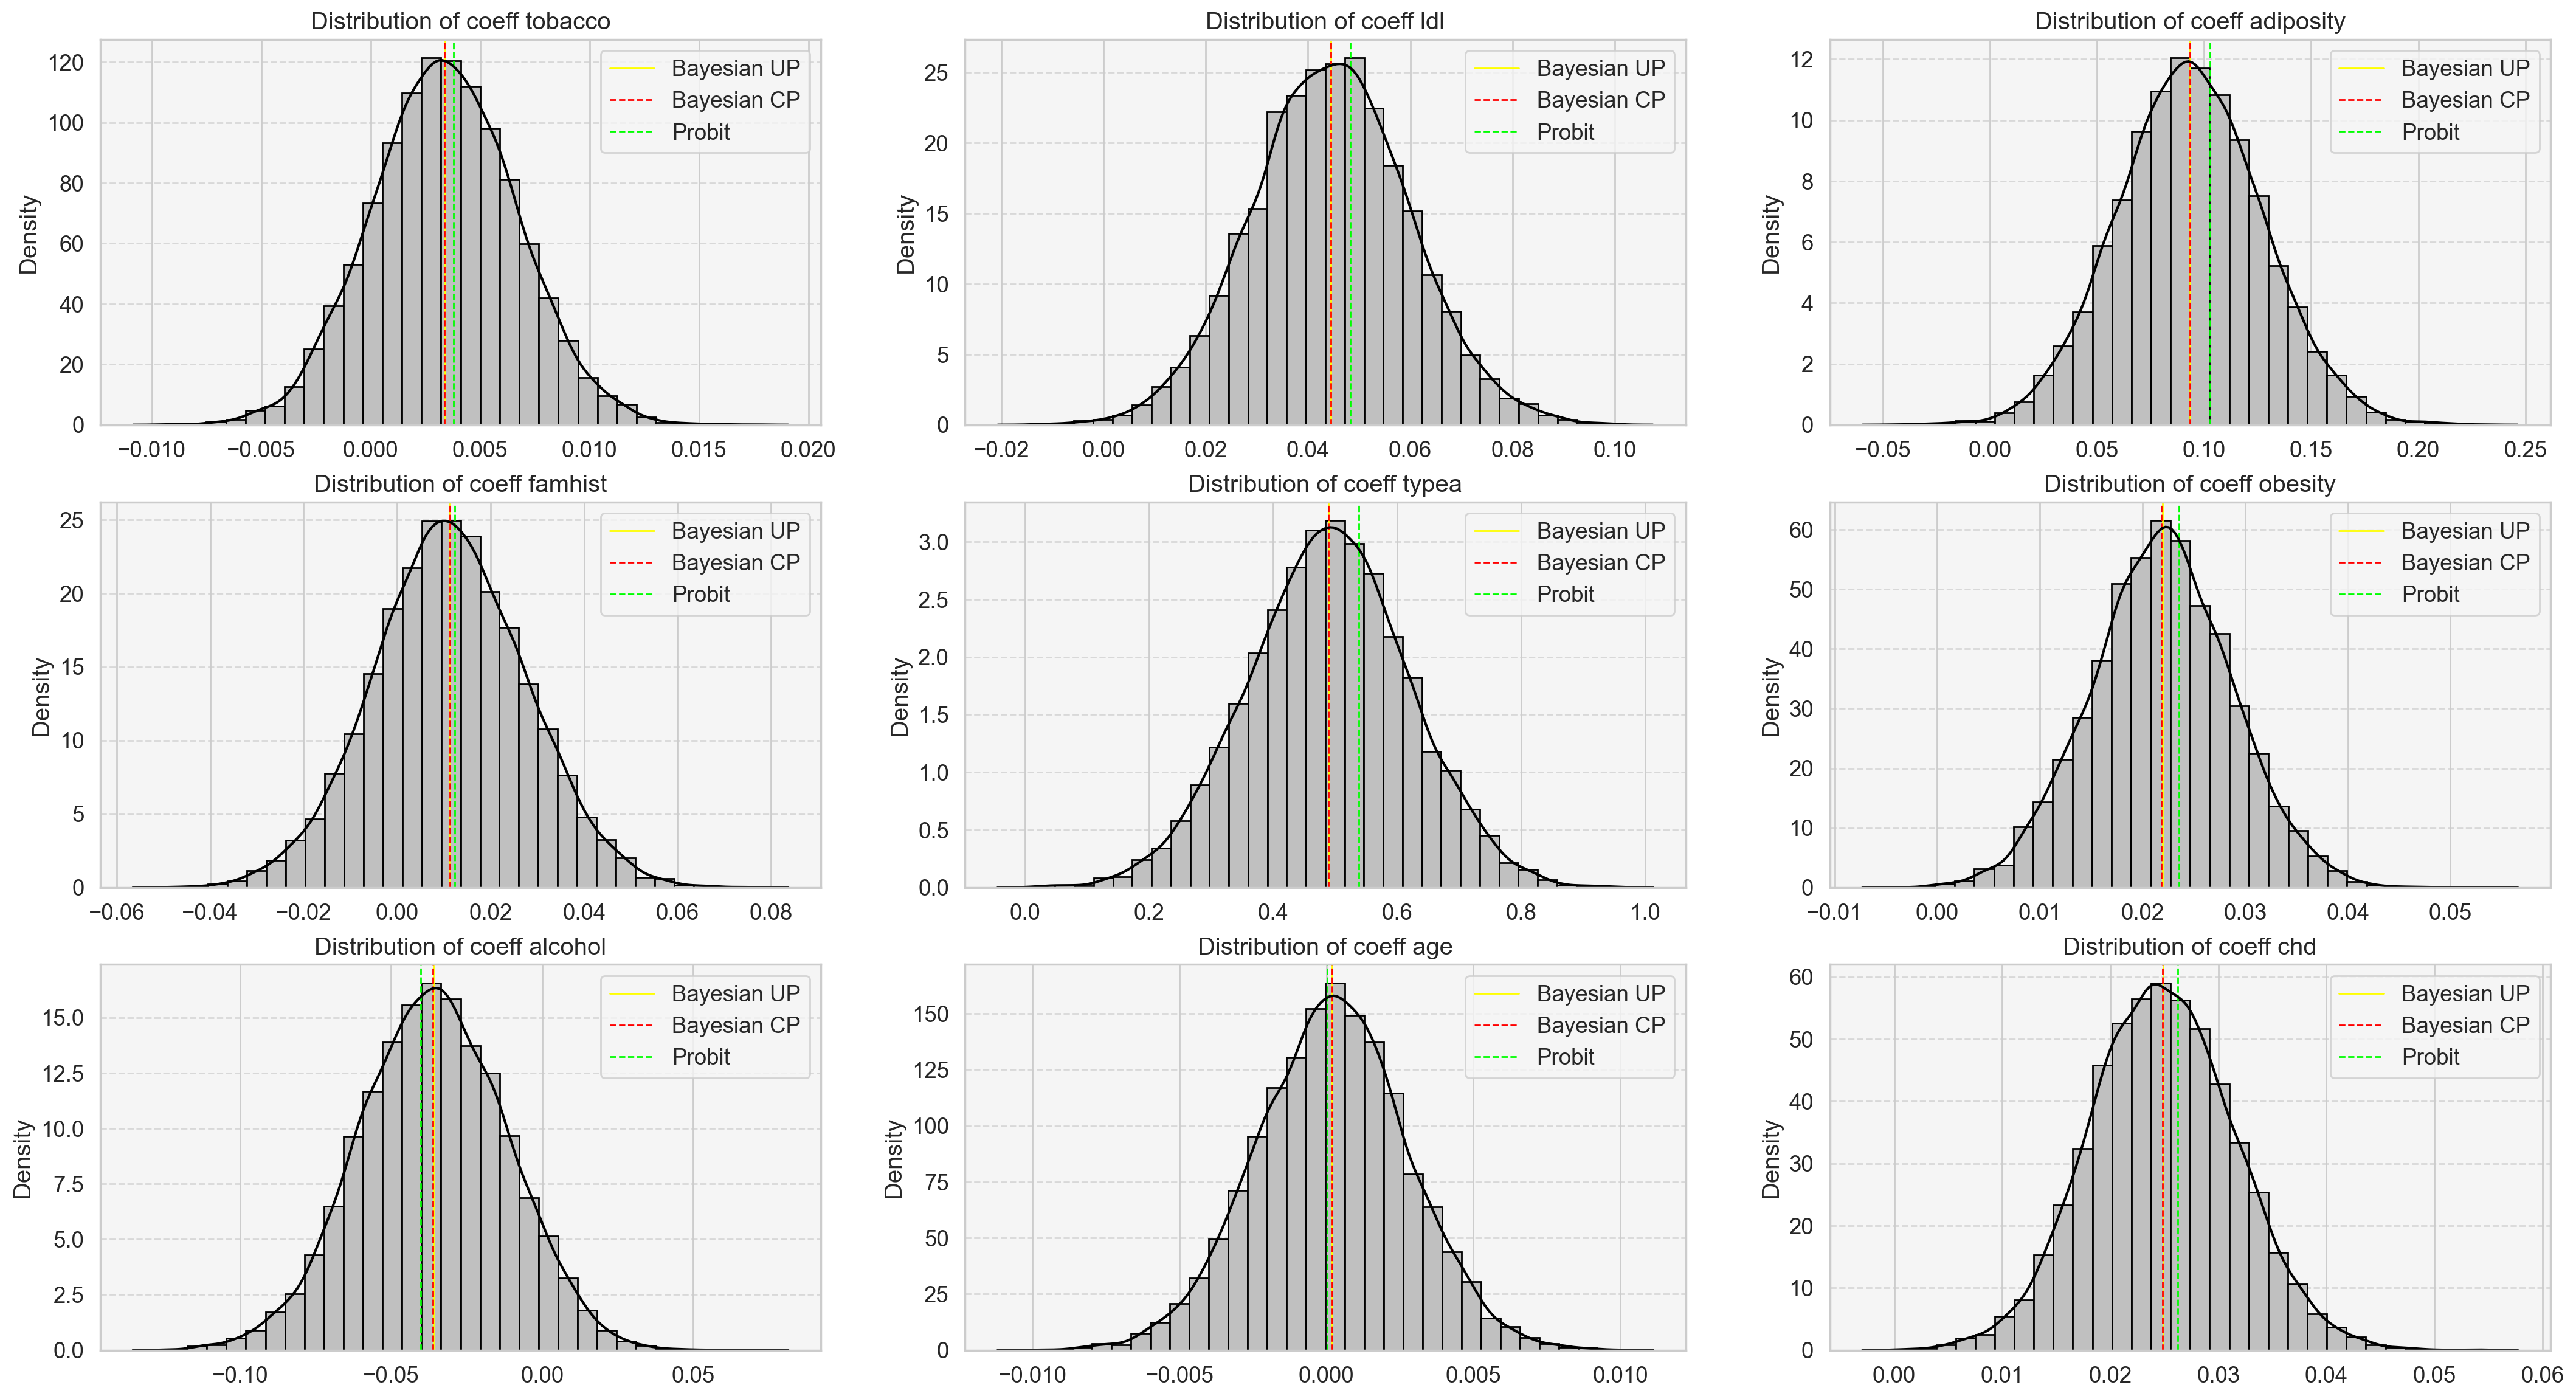

In [19]:
hist(Beta_MCMC, post_mean_up, post_mean,Beta_Probit)

#### Diagnostic on $\beta$

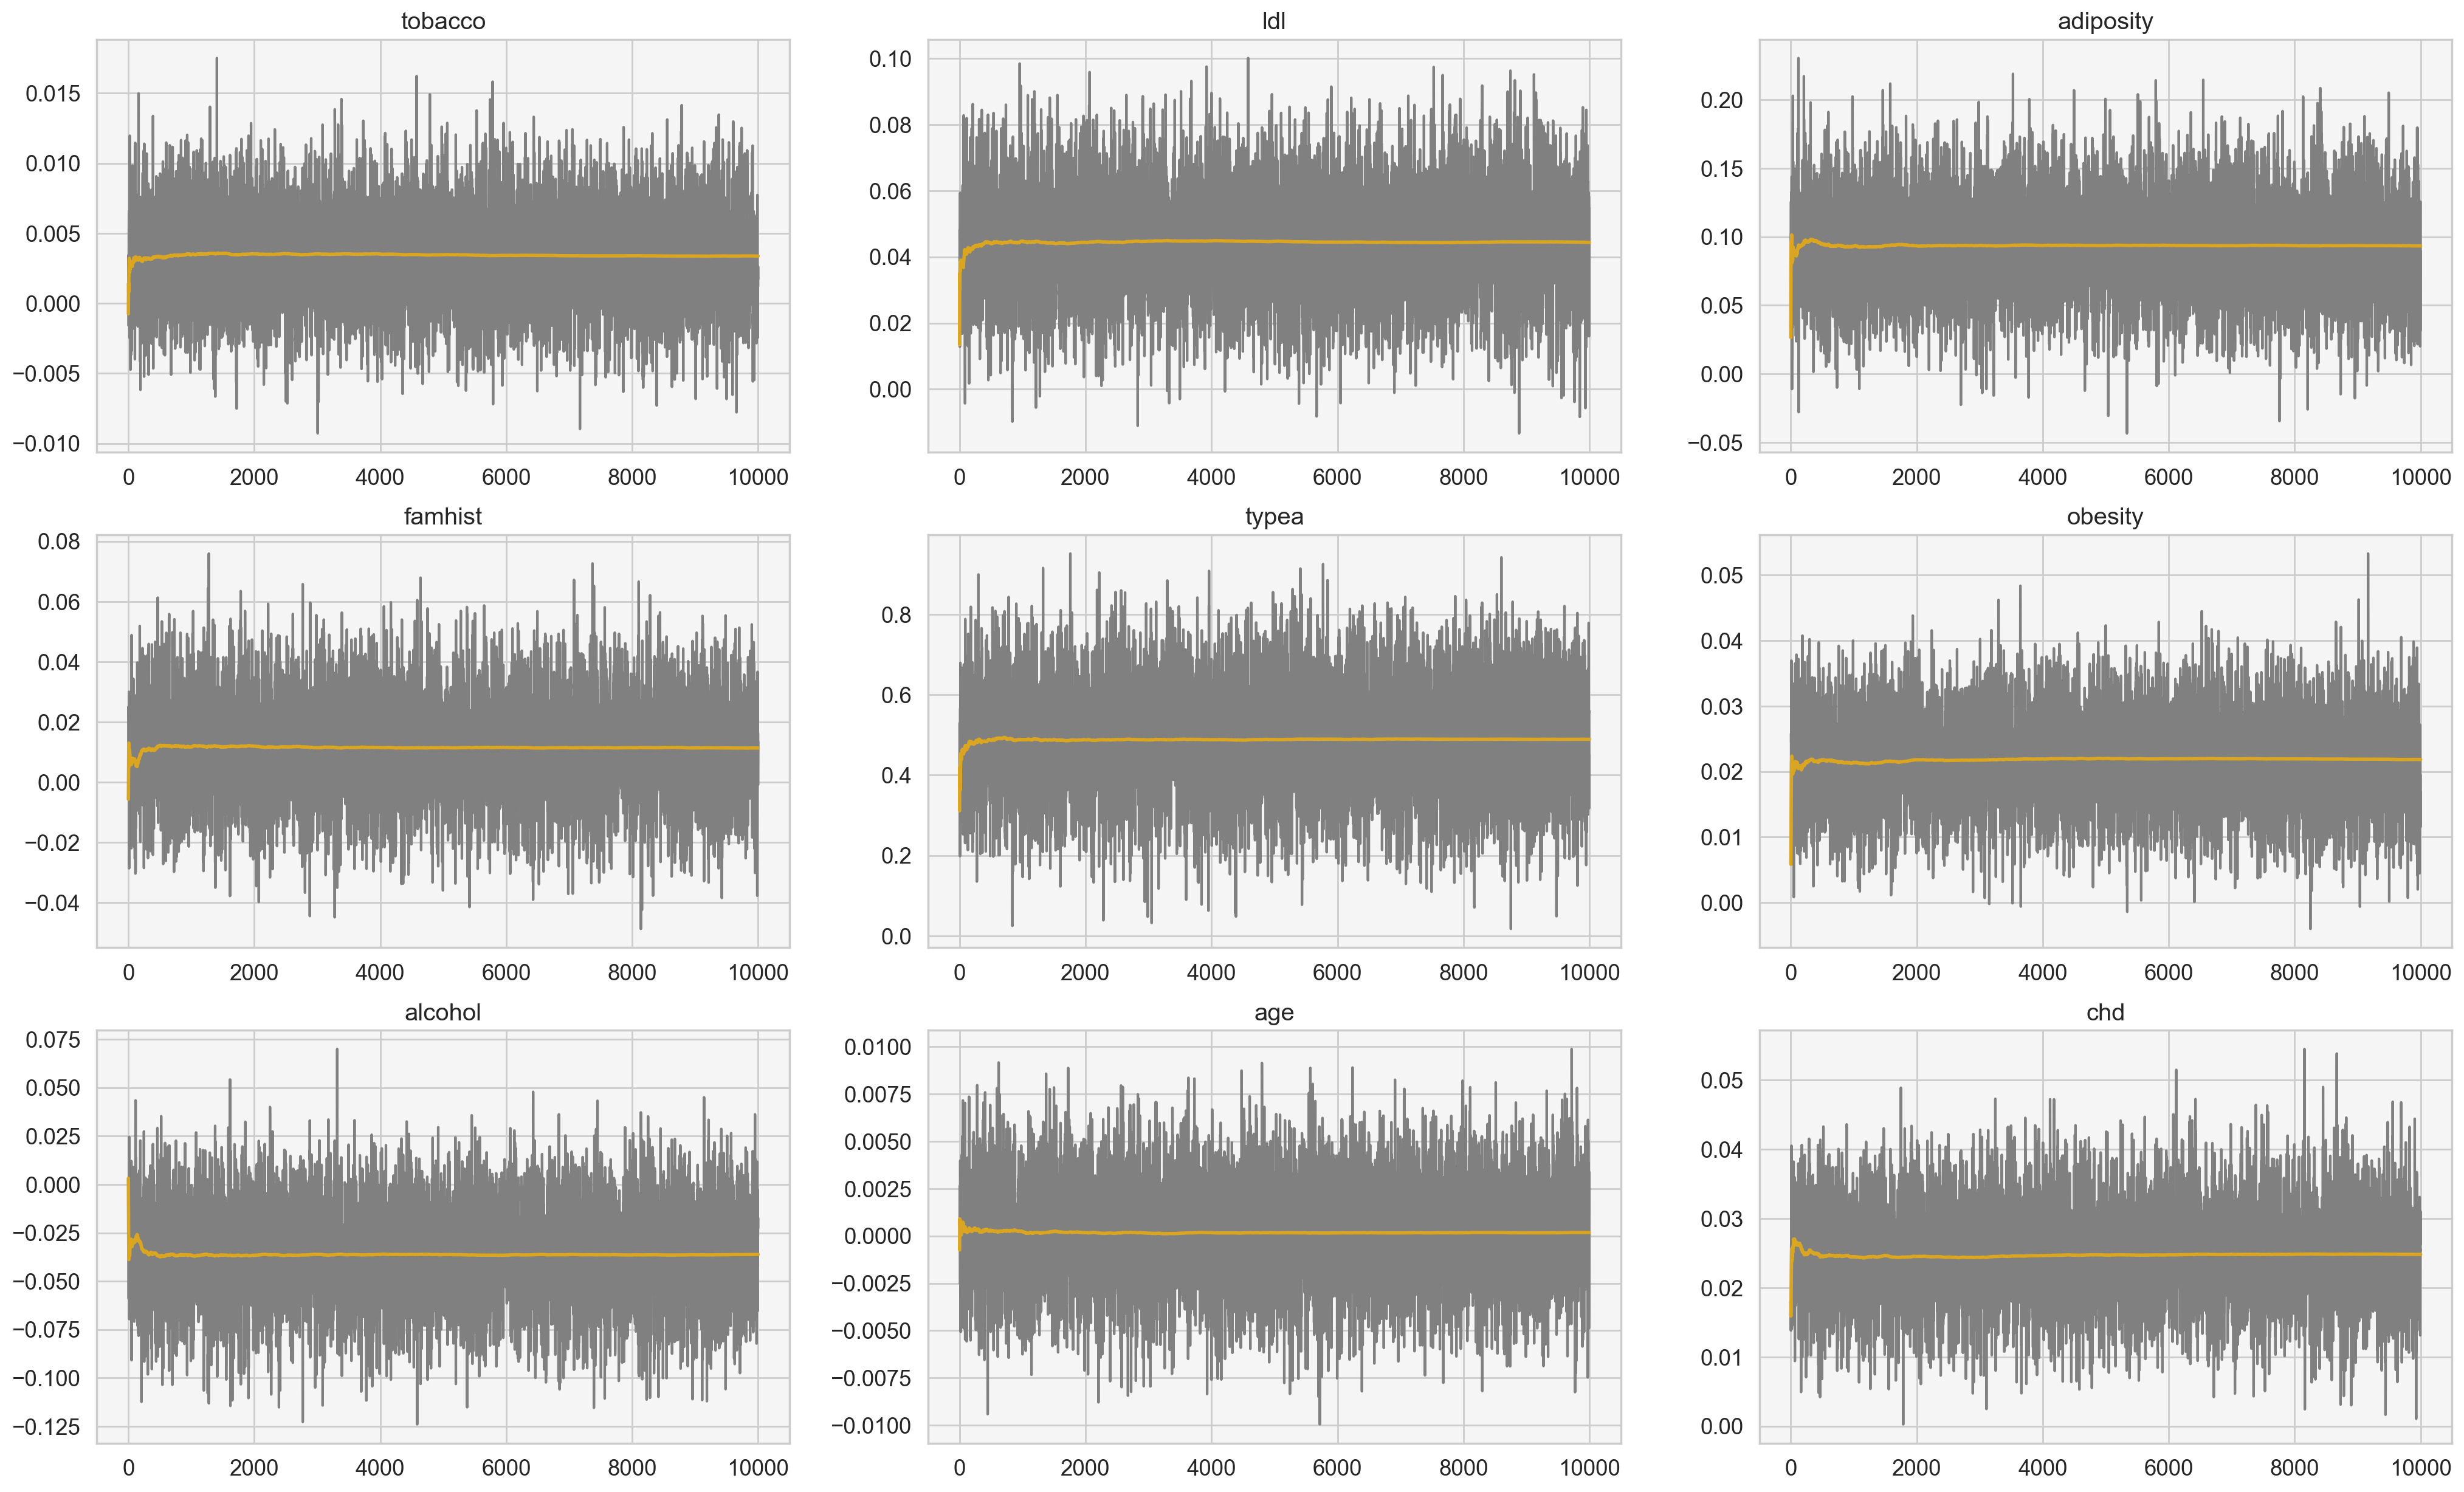

In [20]:
trace(Beta_MCMC)

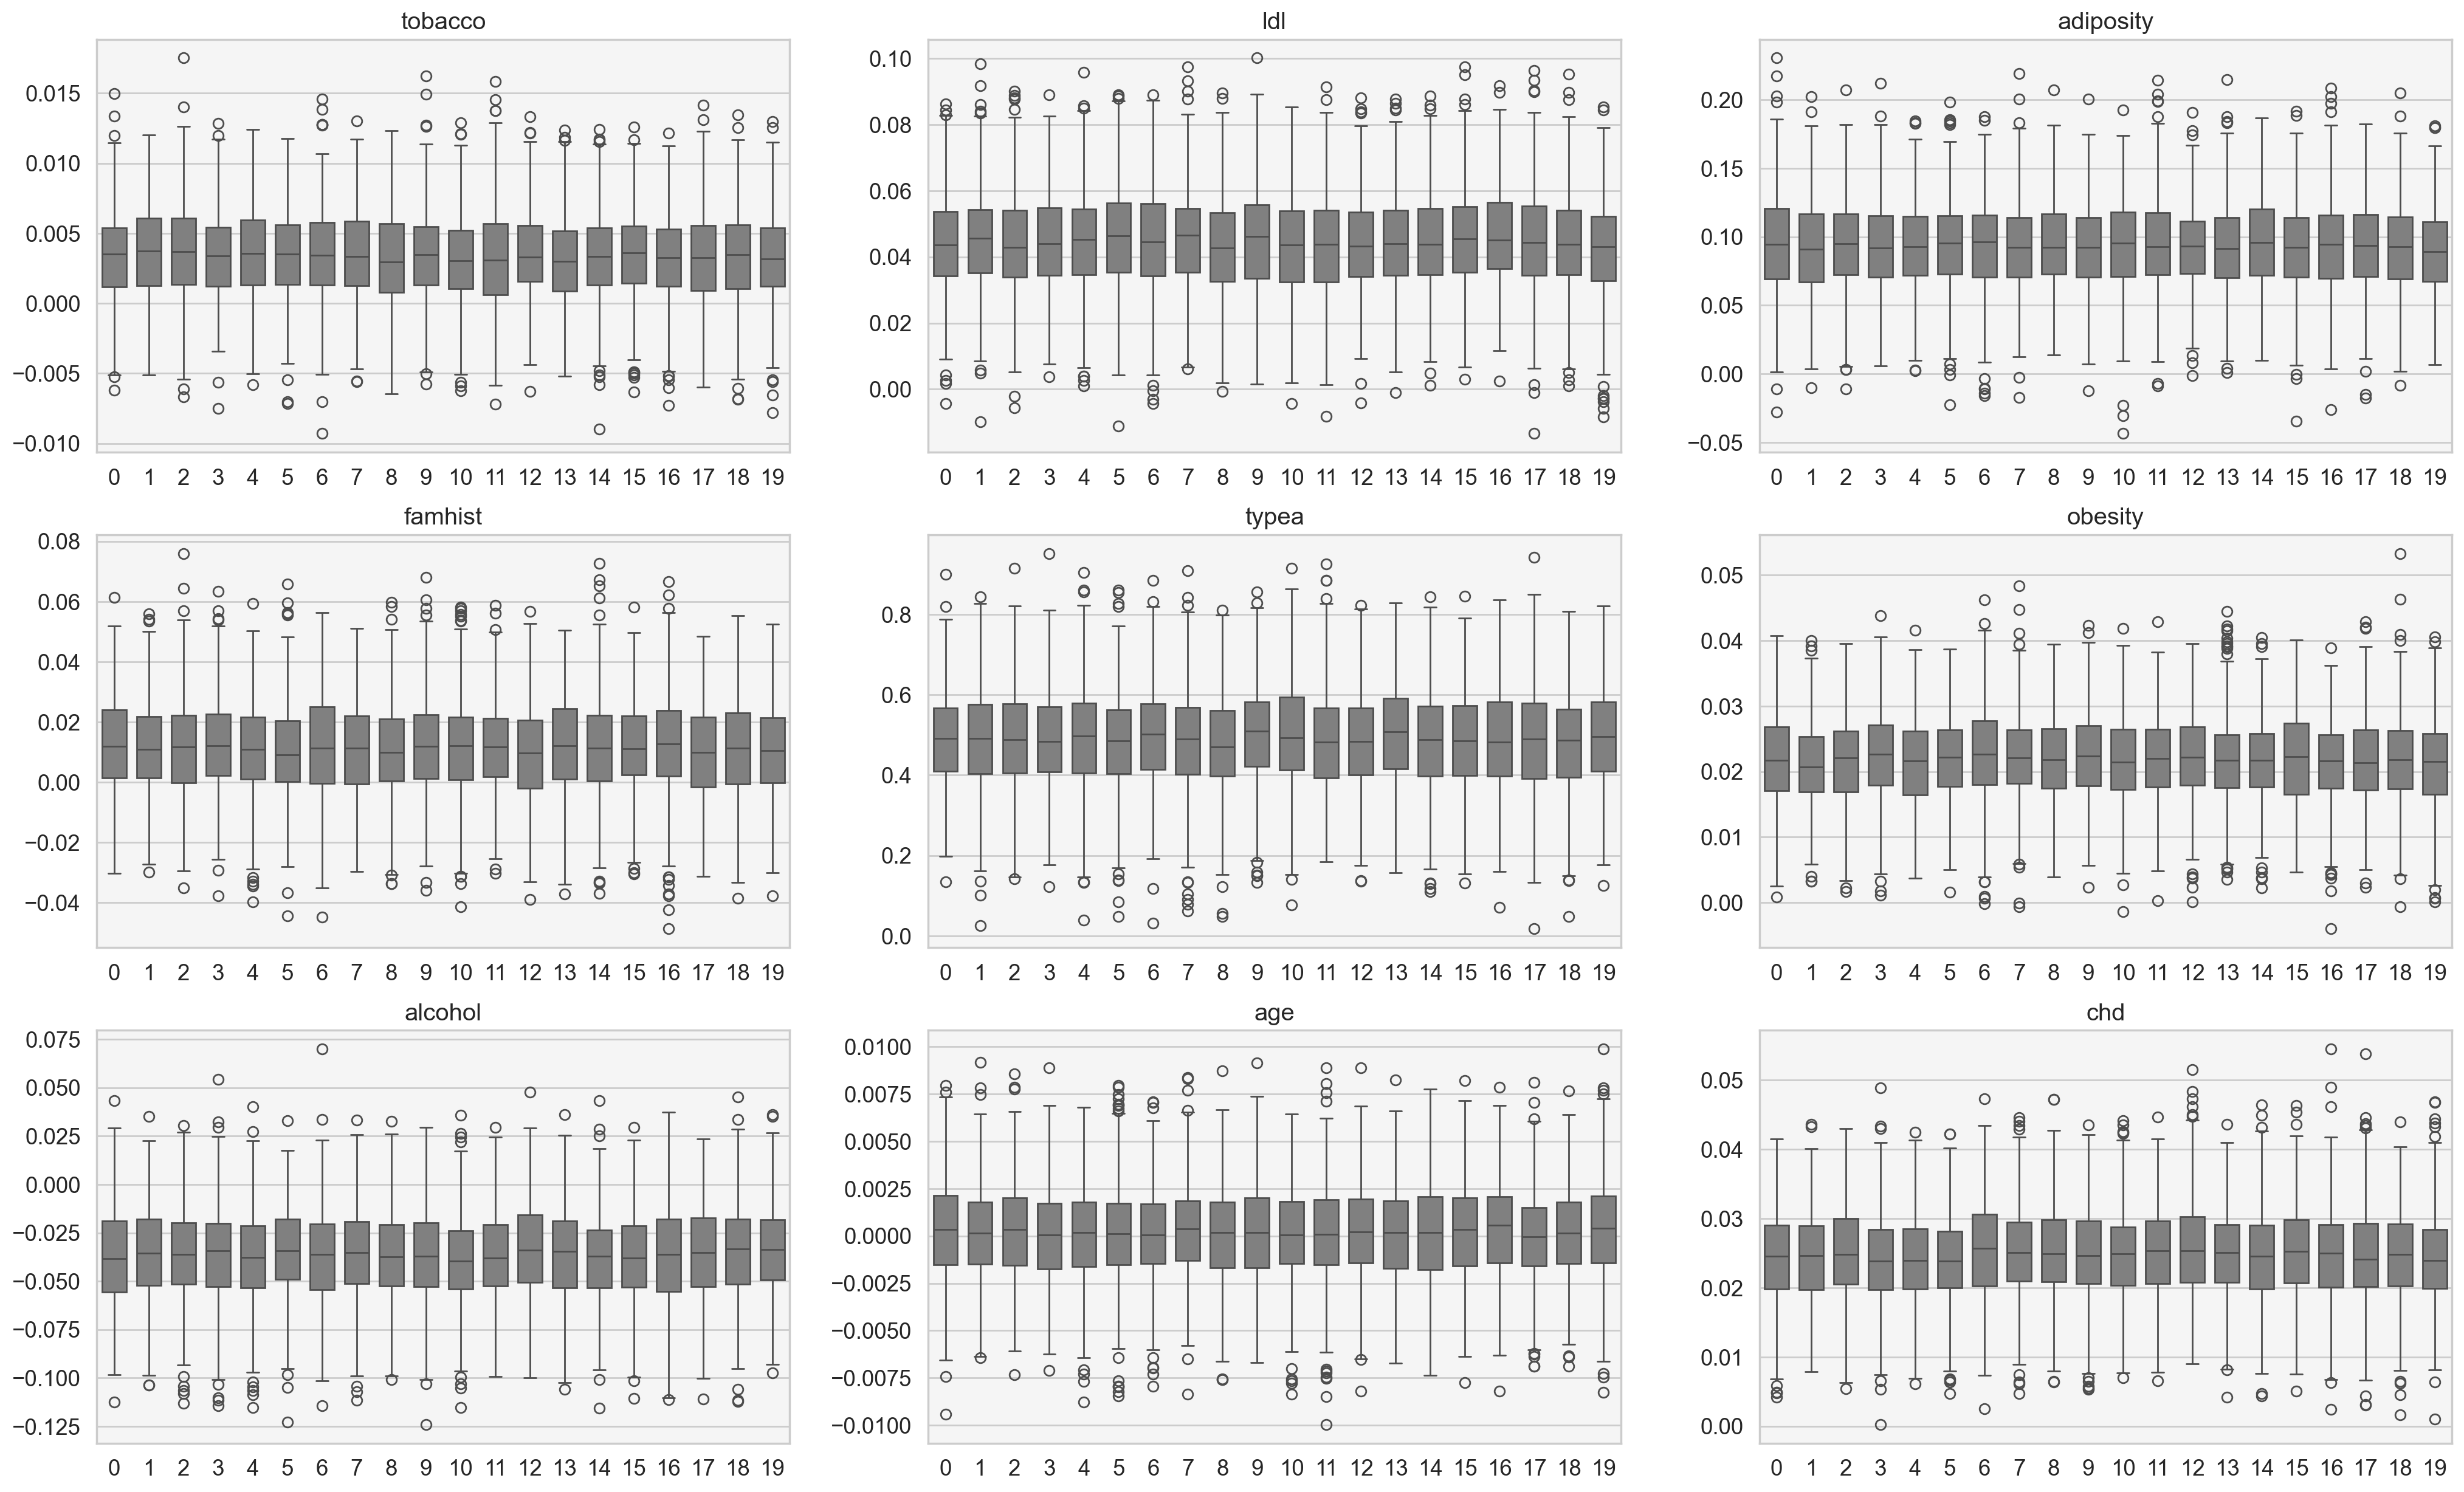

In [21]:
trace_2(Beta_MCMC)

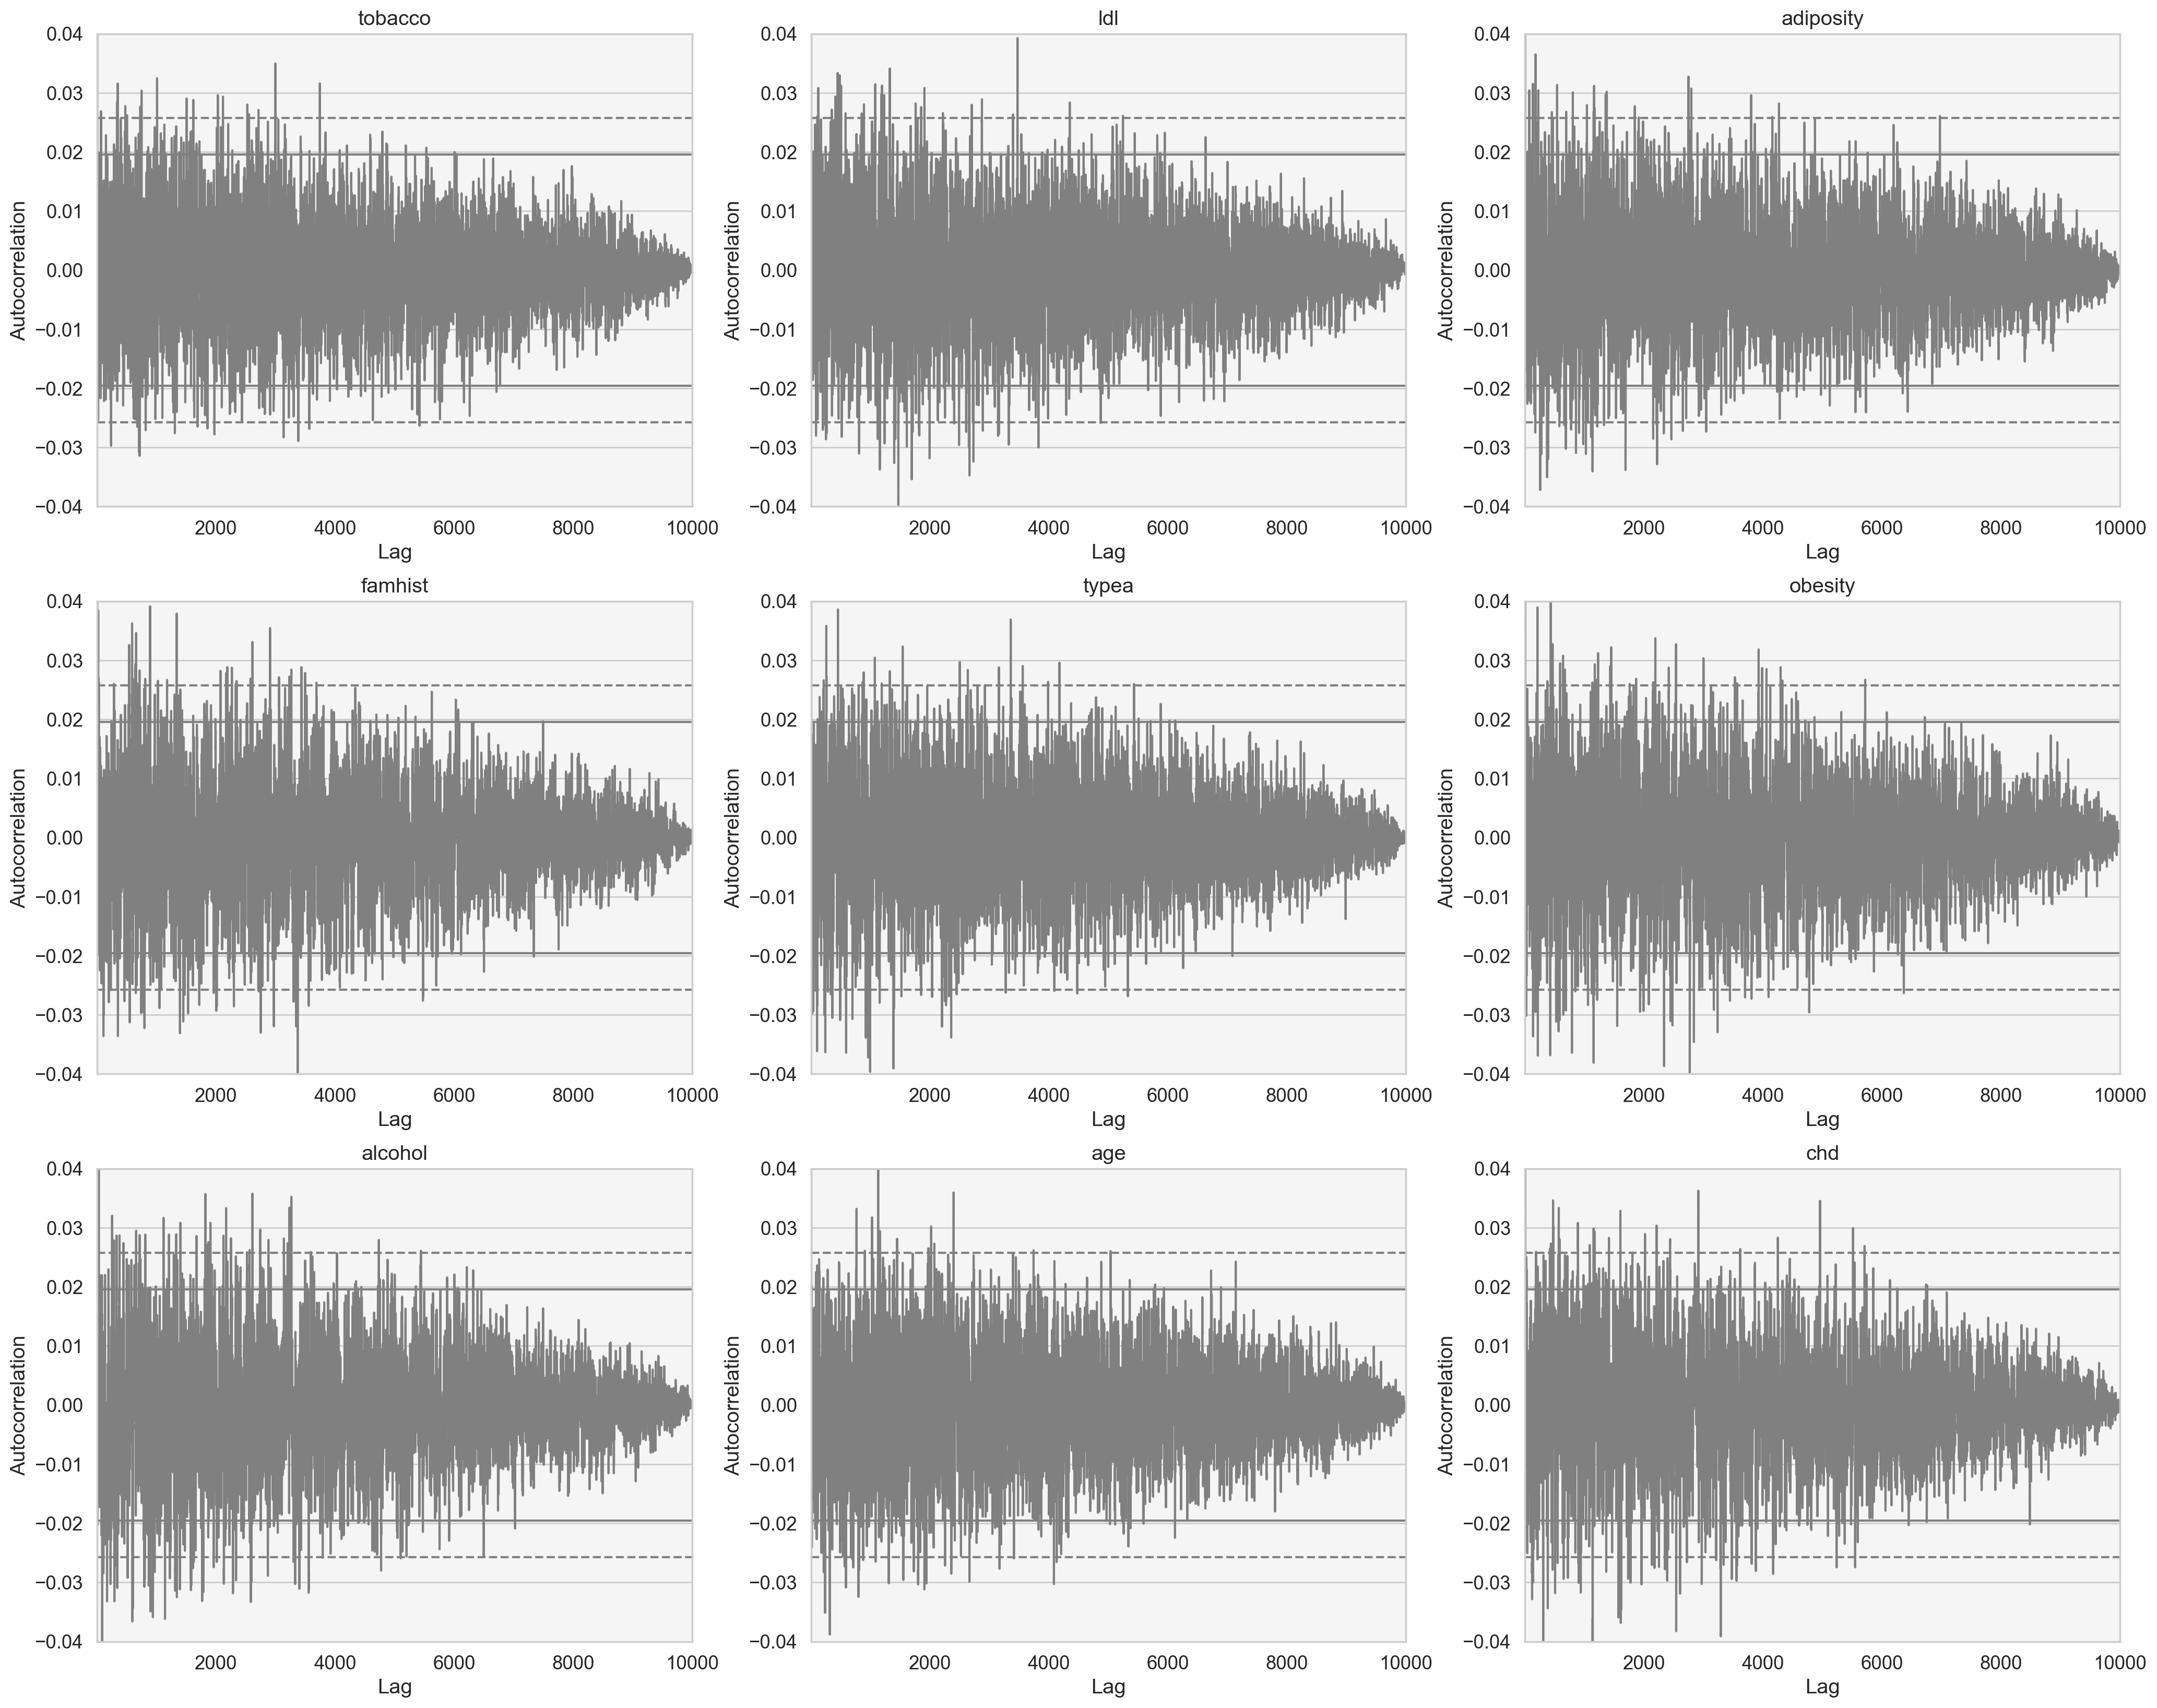

In [22]:
autocorr(Beta_MCMC)

#### Diagnostic on $z$

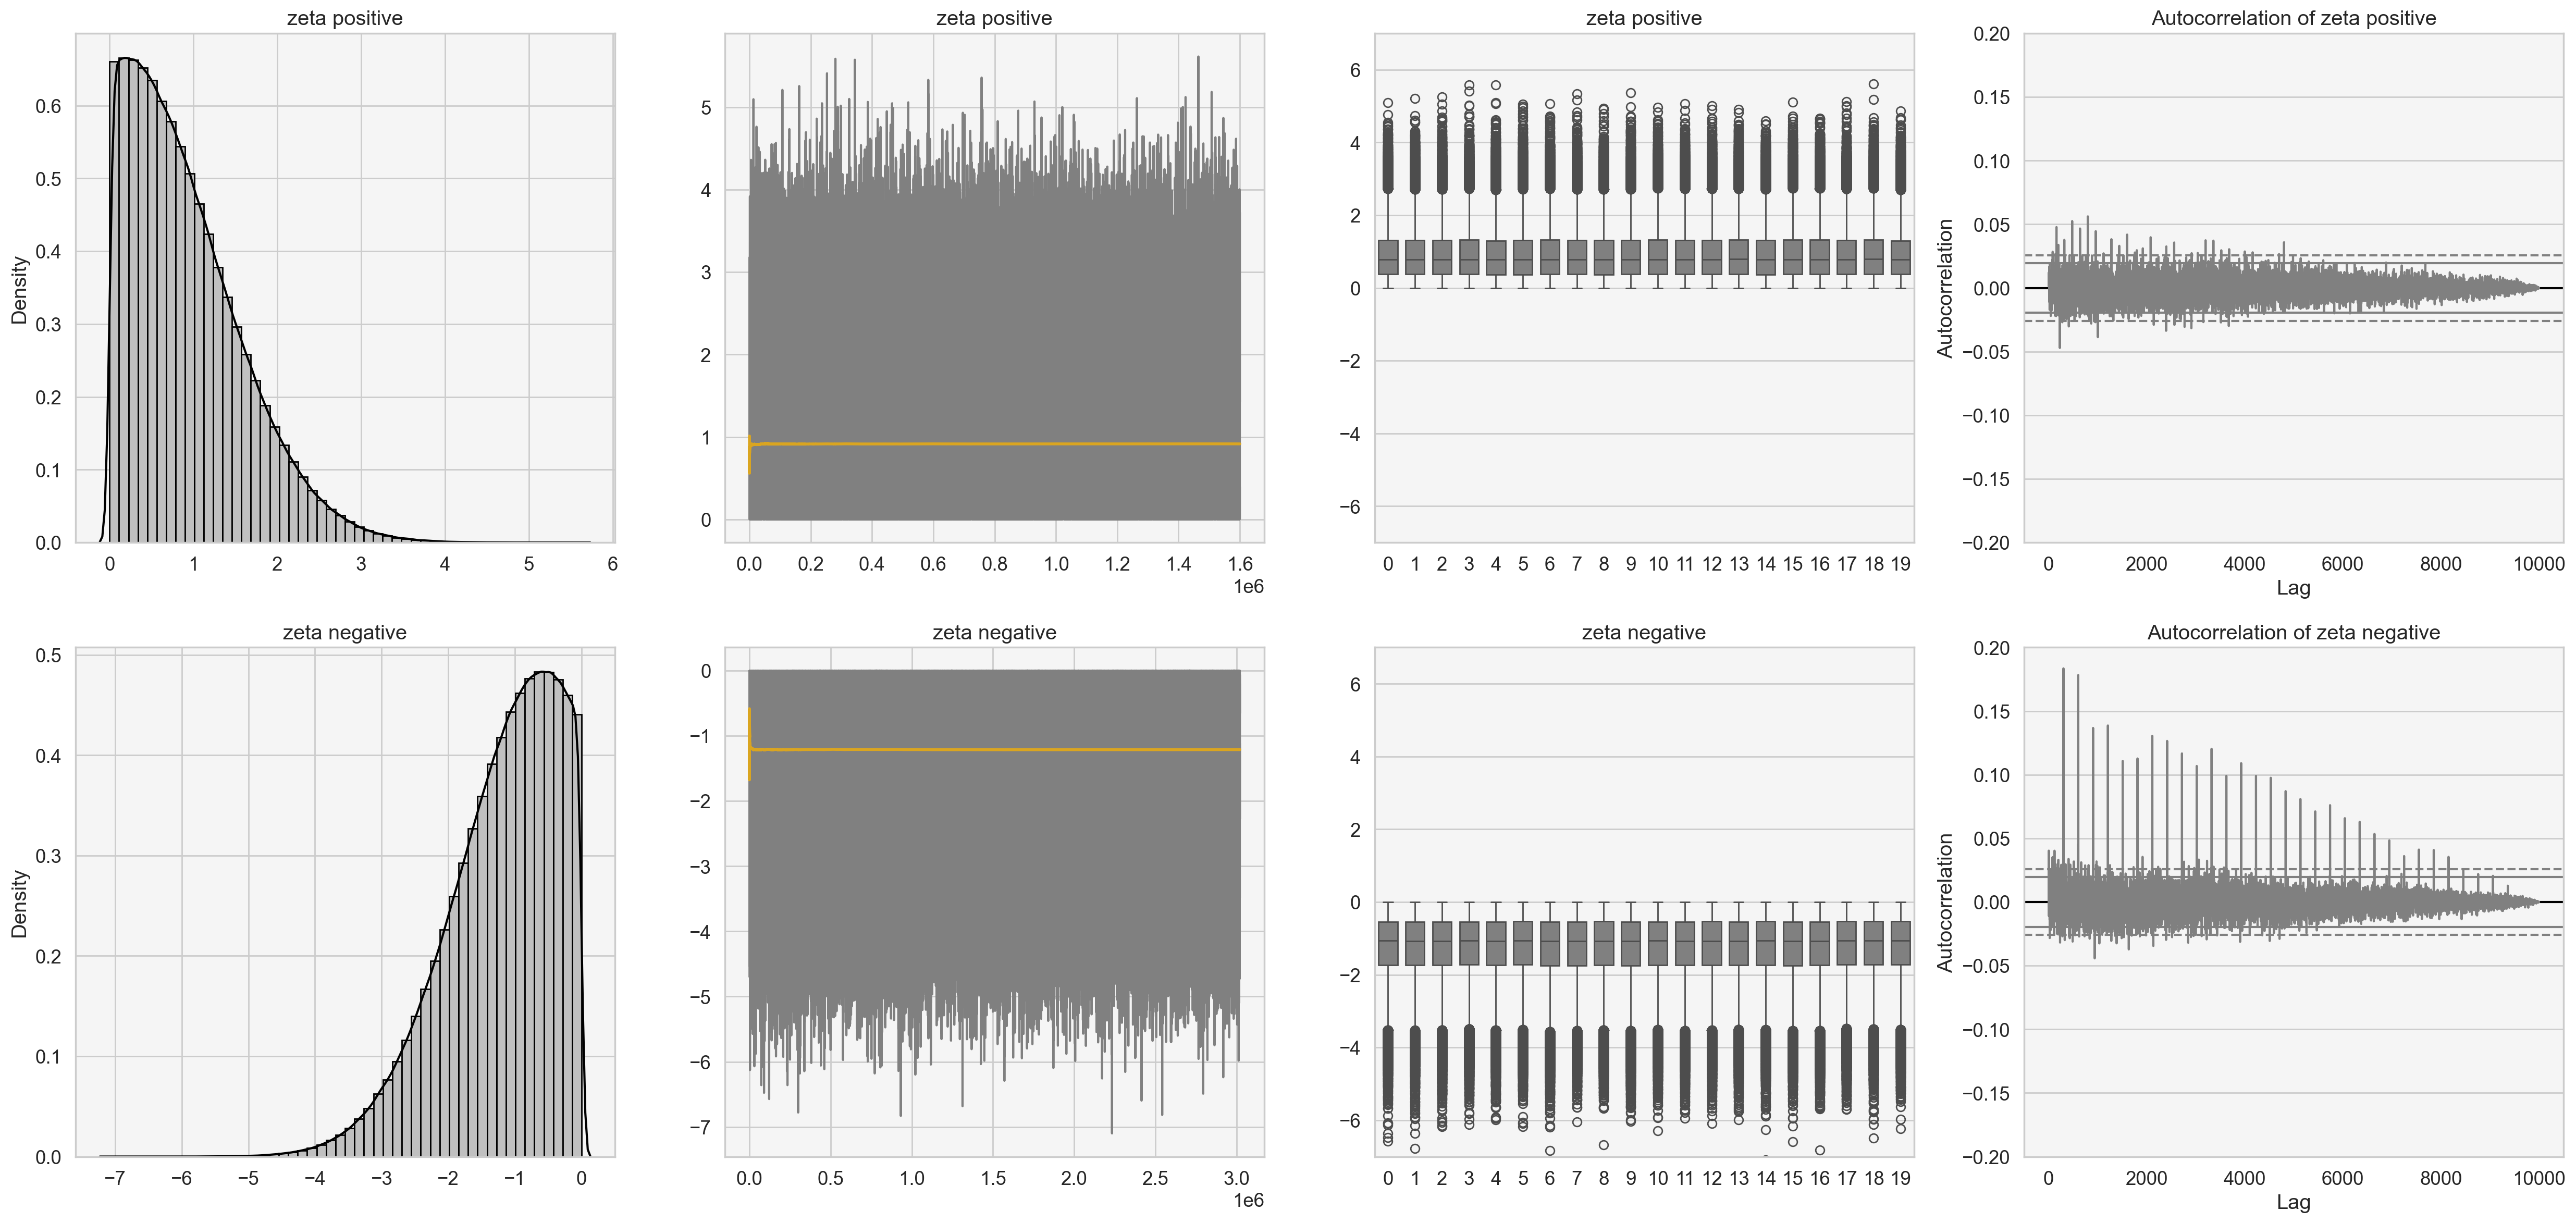

In [23]:
diagnostic_z(zeta_pos, zeta_neg)